In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.preprocessing import label_binarize
from sklearn import metrics

In [2]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [4]:
## 数据加载
path = "datas/iris.data"
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'cla']
df = pd.read_csv(path, header=None, names=names)
df['cla'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: cla, dtype: int64

In [5]:
df.head()

,sepal length,sepal width,petal length,petal width,cla
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
def parseRecord(record):
    result=[]
    r = zip(names,record)
    for name,v in r:
        if name == 'cla':
            if v == 'Iris-setosa':
                result.append(1)
            elif v == 'Iris-versicolor':
                result.append(2)
            elif v == 'Iris-virginica':
                result.append(3)
            else:
                result.append(np.nan)
        else:
            result.append(float(v))
    return result

In [9]:
### 1. 数据转换为数字以及分割
## 数据转换
datas = df.apply(lambda r: pd.Series(parseRecord(r), index=names), axis=1)
## 异常数据删除
datas = datas.dropna(how='any')
## 数据分割
X = datas[names[0:-1]]
Y = datas[names[-1]]
## 数据抽样(训练数据和测试数据分割)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [10]:
print ("原始数据条数:%d；训练数据条数:%d；特征个数:%d；测试样本条数:%d" % (len(X), len(X_train), X_train.shape[1], X_test.shape[0]))

原始数据条数:150；训练数据条数:90；特征个数:4；测试样本条数:60


In [13]:
##### KNN算法实现
# a. 模型构建
# 模型中介绍的K值：n_neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

# b. 模型效果输出
## 将正确的数据转换为矩阵形式
y_test_hot = label_binarize(Y_test,classes=(1,2,3))
## 得到预测属于某个类别的概率值
knn_y_score = knn.predict_proba(X_test)
## 计算roc的值
knn_fpr, knn_tpr, knn_threasholds = metrics.roc_curve(y_test_hot.ravel(),knn_y_score.ravel())
## 计算auc的值
knn_auc = metrics.auc(knn_fpr, knn_tpr)
print ("KNN算法R值：", knn.score(X_train, Y_train))
print ("KNN算法AUC值：", knn_auc)

# c. 模型预测
knn_y_predict = knn.predict(X_test)

KNN算法R值： 0.9888888888888889
KNN算法AUC值： 0.9700000000000001


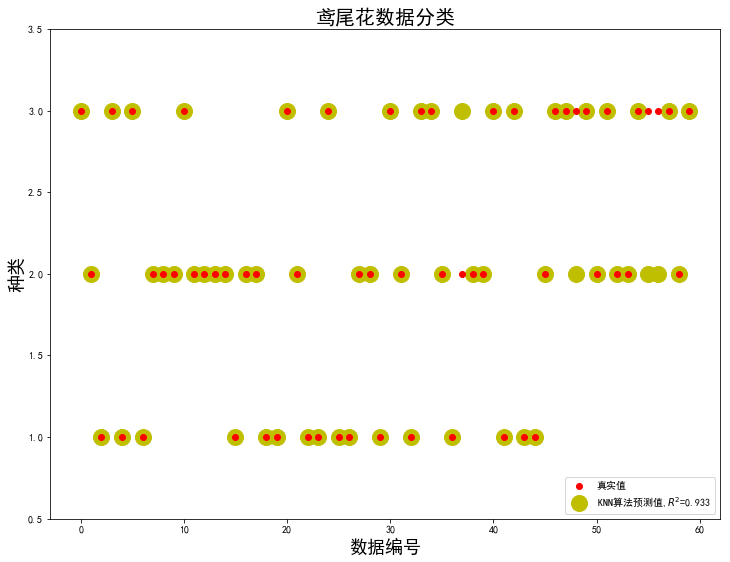

In [14]:
## 画图2：预测结果画图
x_test_len = range(len(X_test))
plt.figure(figsize=(12, 9), facecolor='w')
plt.ylim(0.5,3.5)
plt.plot(x_test_len, Y_test, 'ro',markersize = 6, zorder=3, label=u'真实值')
plt.plot(x_test_len, knn_y_predict, 'yo', markersize = 16, zorder=1, label=u'KNN算法预测值,$R^2$=%.3f' % knn.score(X_test, Y_test))
plt.legend(loc = 'lower right')
plt.xlabel(u'数据编号', fontsize=18)
plt.ylabel(u'种类', fontsize=18)
plt.title(u'鸢尾花数据分类', fontsize=20)
plt.show()